# import packages

In [24]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Data load

In [25]:
df_disease=pd.read_csv("Prediction home assignment data.csv")

In [26]:
df_disease.head()

,ID,Disease,Age,Sex,Blood Pressure,Sport Activity Level,BMI,Alcohol Consumption,Cholesterol Level,Family History of Disease,Medication Use,Occupation Type,Sleep Hours per Night,Stress Level
0,9292,Diabetes,65,Male,8.078688,1.226998,8.654499,6.616191,9.809791,Yes,Yes,Manual,4.502498,3.272403
1,8088,Coronary Heart Disease,68,Male,7.561382,2.399566,7.263741,5.461729,8.256561,Yes,Yes,Sedentary,8.834171,6.614335
2,4976,Diabetes,61,Male,9.190168,2.589369,7.039525,4.674114,9.163775,Yes,Yes,Manual,7.076796,4.784249
3,4376,Coronary Heart Disease,63,Male,9.837562,1.762751,8.356391,7.336146,7.039061,Yes,Yes,Active,8.308582,5.863965
4,3227,Diabetes,83,Male,9.469443,2.559051,7.257912,4.782407,9.860855,Yes,Yes,Manual,2.056106,5.610206


In [27]:
df_disease.shape

(10311, 14)

# EDA

In [28]:
# check how many unique values

In [29]:
df_disease.nunique()

ID                           10311
Disease                          6
Age                            102
Sex                              2
Blood Pressure               10311
Sport Activity Level         10311
BMI                          10311
Alcohol Consumption          10311
Cholesterol Level            10311
Family History of Disease        2
Medication Use                   2
Occupation Type                  3
Sleep Hours per Night        10311
Stress Level                 10311
dtype: int64

In [30]:
# check data type and verfity if there are Nulls
df_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10311 entries, 0 to 10310
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         10311 non-null  int64  
 1   Disease                    10311 non-null  object 
 2   Age                        10311 non-null  int64  
 3   Sex                        10189 non-null  object 
 4   Blood Pressure             10311 non-null  float64
 5   Sport Activity Level       10311 non-null  float64
 6   BMI                        10311 non-null  float64
 7   Alcohol Consumption        10311 non-null  float64
 8   Cholesterol Level          10311 non-null  float64
 9   Family History of Disease  10311 non-null  object 
 10  Medication Use             10311 non-null  object 
 11  Occupation Type            10311 non-null  object 
 12  Sleep Hours per Night      10311 non-null  float64
 13  Stress Level               10311 non-null  flo

In [31]:
#there is null in sex column
df_disease.isnull().sum()

ID                             0
Disease                        0
Age                            0
Sex                          122
Blood Pressure                 0
Sport Activity Level           0
BMI                            0
Alcohol Consumption            0
Cholesterol Level              0
Family History of Disease      0
Medication Use                 0
Occupation Type                0
Sleep Hours per Night          0
Stress Level                   0
dtype: int64

In [32]:
#check if there are weird data
df_disease.describe()

,ID,Age,Blood Pressure,Sport Activity Level,BMI,Alcohol Consumption,Cholesterol Level,Sleep Hours per Night,Stress Level
count,10311.000000,10311.000000,10311.000000,10311.000000,10311.000000,10311.000000,10311.000000,10311.000000,10311.000000
mean,5156.000000,55.027058,7.318626,3.381845,7.386745,5.537098,7.334243,5.533362,6.758784
std,2976.673647,25.269767,2.286853,2.380902,4.571305,2.105974,2.250925,2.808371,2.504161
min,1.000000,-81.000000,1.001694,1.000636,1.004980,1.001299,1.003370,1.001045,1.005226
25%,2578.500000,33.000000,6.669955,1.736170,5.114864,4.243824,6.622169,2.890129,4.978726
50%,5156.000000,57.000000,7.959043,2.472736,7.282356,5.538209,7.940499,5.619195,7.523396
75%,7733.500000,74.000000,8.977563,4.280024,8.706368,6.801099,8.989431,8.133746,8.760922
max,10311.000000,195.000000,9.999322,9.995175,34.958024,9.999554,9.999916,9.999182,9.999634


In [33]:
# there are 139 rows with wrong age
len(df_disease[df_disease.Age<0])

139

In [34]:
df_disease.head(2)

,ID,Disease,Age,Sex,Blood Pressure,Sport Activity Level,BMI,Alcohol Consumption,Cholesterol Level,Family History of Disease,Medication Use,Occupation Type,Sleep Hours per Night,Stress Level
0,9292,Diabetes,65,Male,8.078688,1.226998,8.654499,6.616191,9.809791,Yes,Yes,Manual,4.502498,3.272403
1,8088,Coronary Heart Disease,68,Male,7.561382,2.399566,7.263741,5.461729,8.256561,Yes,Yes,Sedentary,8.834171,6.614335


In [35]:
#function change text to numbers in order to check correlation between columns
def change_text_to_numbers(df,columns):
    enc = LabelEncoder()
    for col in columns:
        unique_vals=sorted(df[col].dropna().unique())
        print(col,'_',unique_vals)
        if col=='Disease':
            disease_map={ 'Healthy':0,
                          'Anxiety': 1, 
                          'Depression':2 ,
                          'Autoimmune Disorder':3,
                          'Diabetes':4,
                          'Coronary Heart Disease':5 }
            df['Disease_1'] = df[col].map(disease_map)
        elif col=='Occupation Type':
            Occupation_map={
                'Sedentary':0,
                'Active':1,
                'Manual':2 
            }
            df['OccupationType_1'] = df[col].map(Occupation_map)
        elif (len(unique_vals)==2):
            df[col+'_1'] = df[col].map({unique_vals[0]: 0, unique_vals[1]: 1})
            
    return
    

In [36]:
change_text_to_numbers(df_disease,['Disease',
 'Sex',
 'Family History of Disease',
 'Medication Use',
 'Occupation Type'])

Disease _ ['Anxiety', 'Autoimmune Disorder', 'Coronary Heart Disease', 'Depression', 'Diabetes', 'Healthy']
Sex _ ['Female', 'Male']
Family History of Disease _ ['No', 'Yes']
Medication Use _ ['No', 'Yes']
Occupation Type _ ['Active', 'Manual', 'Sedentary']


In [38]:
df_disease.head()

,ID,Disease,Age,Sex,Blood Pressure,Sport Activity Level,BMI,Alcohol Consumption,Cholesterol Level,Family History of Disease,Medication Use,Occupation Type,Sleep Hours per Night,Stress Level,Disease_1,Sex_1,Family History of Disease_1,Medication Use_1,OccupationType_1
0,9292,Diabetes,65,Male,8.078688,1.226998,8.654499,6.616191,9.809791,Yes,Yes,Manual,4.502498,3.272403,4,1.0,1,1,2
1,8088,Coronary Heart Disease,68,Male,7.561382,2.399566,7.263741,5.461729,8.256561,Yes,Yes,Sedentary,8.834171,6.614335,5,1.0,1,1,0
2,4976,Diabetes,61,Male,9.190168,2.589369,7.039525,4.674114,9.163775,Yes,Yes,Manual,7.076796,4.784249,4,1.0,1,1,2
3,4376,Coronary Heart Disease,63,Male,9.837562,1.762751,8.356391,7.336146,7.039061,Yes,Yes,Active,8.308582,5.863965,5,1.0,1,1,1
4,3227,Diabetes,83,Male,9.469443,2.559051,7.257912,4.782407,9.860855,Yes,Yes,Manual,2.056106,5.610206,4,1.0,1,1,2


In [39]:
df_disease[['Disease_1','Disease']].drop_duplicates().sort_values('Disease_1')

,Disease_1,Disease
11,0,Healthy
5,1,Anxiety
9,2,Depression
31,3,Autoimmune Disorder
0,4,Diabetes
1,5,Coronary Heart Disease


In [40]:
df_disease[['OccupationType_1','Occupation Type']].drop_duplicates().sort_values('OccupationType_1')

,OccupationType_1,Occupation Type
1,0,Sedentary
3,1,Active
0,2,Manual


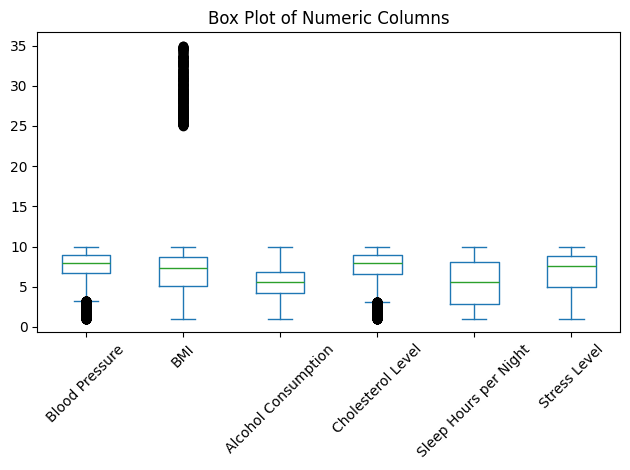

In [41]:
# check anomlies in the data
df_disease[['Blood Pressure',
 'Sport Activity Level',
 'Sport Activity Level',
 'BMI',
 'Alcohol Consumption',
 'Cholesterol Level',
 'Sleep Hours per Night',
 'Stress Level']].plot.box()
plt.title("Box Plot of Numeric Columns")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [42]:
# there are 311 rows with very high BMI when comparinmg it to the avergae BMI in the dataset
len(df_disease[df_disease.BMI>15])

311

In [43]:
corr_all_columns= df_disease[[col for col in df_disease.columns if df_disease[col].dtype != 'object']].corr()
corr_all_columns

,ID,Age,Blood Pressure,Sport Activity Level,BMI,Alcohol Consumption,Cholesterol Level,Sleep Hours per Night,Stress Level,Disease_1,Sex_1,Family History of Disease_1,Medication Use_1,OccupationType_1
ID,1.000000,-0.045549,-0.002433,-0.010515,0.257685,0.044707,0.003696,0.032785,0.016903,0.016856,0.032341,-0.032887,0.005331,-0.026320
Age,-0.045549,1.000000,0.009725,-0.290510,-0.004933,-0.009315,0.275035,0.204512,-0.266309,0.398122,0.420674,0.011795,0.245082,0.138070
Blood Pressure,-0.002433,0.009725,1.000000,-0.061877,0.143944,-0.013470,0.053829,-0.267110,-0.052164,0.387297,0.252939,0.243722,0.223753,-0.072713
Sport Activity Level,-0.010515,-0.290510,-0.061877,1.000000,-0.172013,-0.003041,-0.428700,-0.321854,0.065172,-0.581667,-0.298875,-0.259771,-0.242186,-0.273161
BMI,0.257685,-0.004933,0.143944,-0.172013,1.000000,0.140105,0.144396,0.106184,-0.068859,0.337807,0.349201,-0.023406,0.183402,-0.047200
Alcohol Consumption,0.044707,-0.009315,-0.013470,-0.003041,0.140105,1.000000,0.005625,0.010351,0.002179,0.027318,0.022698,-0.020820,0.012845,-0.023562
Cholesterol Level,0.003696,0.275035,0.053829,-0.428700,0.144396,0.005625,1.000000,0.287483,-0.062044,0.522234,0.260024,0.245169,0.234801,0.245925
Sleep Hours per Night,0.032785,0.204512,-0.267110,-0.321854,0.106184,0.010351,0.287483,1.000000,0.005564,0.132152,0.021849,-0.005908,0.003427,0.254247
Stress Level,0.016903,-0.266309,-0.052164,0.065172,-0.068859,0.002179,-0.062044,0.005564,1.000000,-0.216890,-0.457047,0.154707,-0.207059,0.058165
Disease_1,0.016856,0.398122,0.387297,-0.581667,0.337807,0.027318,0.522234,0.132152,-0.216890,1.000000,0.654332,0.403475,0.484485,0.155751


In [44]:
corr_all_columns.sort_values(['Disease_1'])['Disease_1']

Sport Activity Level          -0.581667
Stress Level                  -0.216890
ID                             0.016856
Alcohol Consumption            0.027318
Sleep Hours per Night          0.132152
OccupationType_1               0.155751
BMI                            0.337807
Blood Pressure                 0.387297
Age                            0.398122
Family History of Disease_1    0.403475
Medication Use_1               0.484485
Cholesterol Level              0.522234
Sex_1                          0.654332
Disease_1                      1.000000
Name: Disease_1, dtype: float64

In [50]:
disease_map={ 'Healthy':0,
                          'Anxiety': 1, 
                          'Depression':2 ,
                          'Autoimmune Disorder':3,
                          'Diabetes':4,
                          'Coronary Heart Disease':5 }

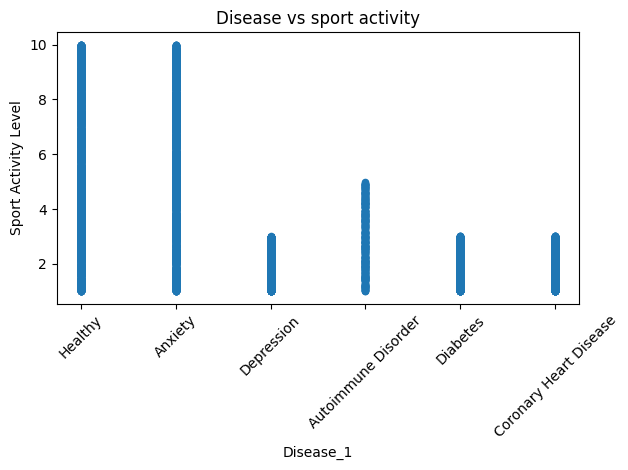

In [51]:
df_disease.plot.scatter(x='Disease_1', y='Sport Activity Level', title='Disease vs sport activity')
plt.xticks(
    ticks=list(disease_map.values()),  # [0, 1, 2, 3, 4, 5]
    labels=list(disease_map.keys()),   # ['Coronary Heart Disease', ...]
    rotation=45                         # Optional: rotate for better readability
)

plt.tight_layout() 
plt.show()

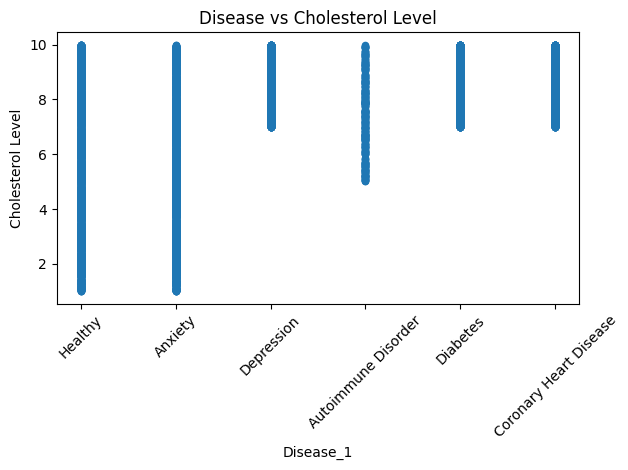

In [52]:
df_disease.plot.scatter(x='Disease_1', y='Cholesterol Level', title='Disease vs Cholesterol Level')
plt.xticks(
    ticks=list(disease_map.values()),  # [0, 1, 2, 3, 4, 5]
    labels=list(disease_map.keys()),   # ['Coronary Heart Disease', ...]
    rotation=45                         # Optional: rotate for better readability
)

plt.tight_layout() 
plt.show()

In [57]:
# 4 of  5 of the diseases diveded to just men or women
df_disease.groupby(['Disease','Sex'])['ID'].count().reset_index()

,Disease,Sex,ID
0,Anxiety,Female,2024
1,Autoimmune Disorder,Female,56
2,Autoimmune Disorder,Male,255
3,Coronary Heart Disease,Male,1990
4,Depression,Female,1998
5,Diabetes,Male,1984
6,Healthy,Female,949
7,Healthy,Male,933


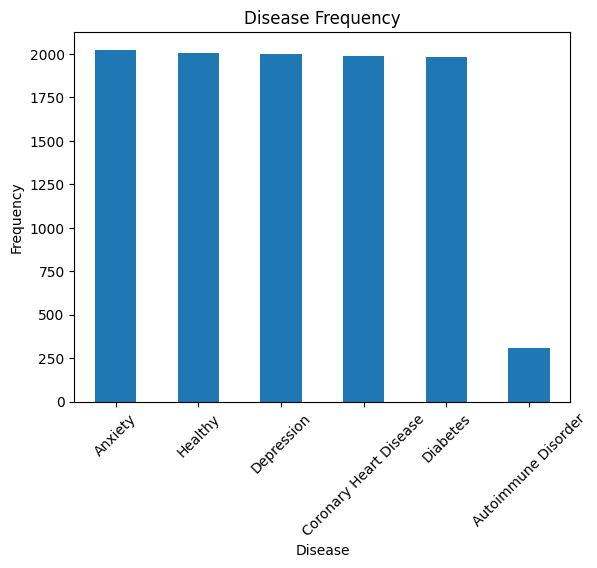

In [27]:
df_disease.Disease.value_counts().plot(kind='bar', title='Disease Frequency')
plt.xticks(rotation=45)
plt.xlabel('Disease')
plt.ylabel('Frequency')
plt.show()

# model 1- predict disease

## Data Preperation

## split data

## model 2 - Anomaly Detection, find patients with unusual combination